In [1]:
#Importancion de la libreria necesaria
# ==============================================================================
import numpy as np #útil para operaciones matemáticas, arrays, álgebra lineal y estadísticas con eficiencia.
import pandas as pd #para manipular y analizar estructuras tabulares como DataFrames y Series.
import statsmodels.api as sm #para análisis estadístico, modelos de regresión, pruebas de hipótesis y estadística descriptiva.
from ydata_profiling import ProfileReport #Genera informes automáticos de análisis exploratorio de datos (EDA) a partir de DataFrames.
import re #Permite trabajar con expresiones regulares para validar, buscar o transformar texto en strings.
# ==============================================================================
import matplotlib.pyplot as plt #para crear gráficos como histogramas, líneas, dispersión y visualizaciones en general.
import matplotlib.font_manager #Gestiona y accede a las fuentes tipográficas usadas en las visualizaciones de matplotlib.
from matplotlib import style #Permite aplicar estilos predefinidos (como ggplot) a las visualizaciones de matplotlib fácilmente.
style.use('ggplot') or plt.style.use('ggplot') #Aplica el estilo visual ggplot a los gráficos para mejorar estética y coherencia visual.
 
# ==============================================================================
from sklearn.decomposition import PCA #Importa PCA, técnica para reducir dimensiones preservando varianza, usada en Machine Learning.
from sklearn.pipeline import make_pipeline #Crea pipelines que encadenan pasos de preprocesamiento y modelado en flujos reutilizables.
from sklearn.preprocessing import StandardScaler #Escala los datos para que tengan media cero y desviación estándar uno (normalización).
from sklearn.preprocessing import scale #Función alternativa para escalar rápidamente datos sin crear objetos StandardScaler.
 
import dtale #Herramienta para explorar DataFrames interactivamente en el navegador, útil para EDA visual.
import itables #Permite mostrar DataFrames como tablas interactivas con filtros y ordenamientos en notebooks.
 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore') #Desactiva la visualización de advertencias para mantener la salida limpia y enfocada.

In [38]:
dfCredito = pd.read_excel("DataSet_ML.xlsx")
dfCredito.drop(["Unnamed: 0"],axis=1, inplace=True)
dfCredito.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,120000,female,university,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
1,90000,female,university,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [39]:
#= Covertir variables categoricas a numericas (dummies - ones hot encoding)====

dfCredito.dtypes #da los tipos de dato por cada variable

LIMIT_BAL                          int64
SEX                               object
EDUCATION                         object
MARRIAGE                           int64
AGE                                int64
PAY_0                              int64
PAY_2                              int64
PAY_3                              int64
PAY_4                              int64
PAY_5                              int64
PAY_6                              int64
BILL_AMT1                          int64
BILL_AMT2                          int64
BILL_AMT3                          int64
BILL_AMT4                          int64
BILL_AMT5                          int64
BILL_AMT6                          int64
PAY_AMT1                           int64
PAY_AMT2                           int64
PAY_AMT3                           int64
PAY_AMT4                           int64
PAY_AMT5                           int64
PAY_AMT6                           int64
default payment next month (Y)    object
dtype: object

In [40]:
print (dfCredito.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')


In [45]:
caracteristicas = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

dfCopia = dfCredito.copy() #Para copiar
variablesCategoricas = dfCredito.select_dtypes(include = ['object', 'string', 'category']).columns.tolist()
print ("Variables categoricas: ", variablesCategoricas)

Variables categoricas:  ['SEX', 'EDUCATION', 'default payment next month (Y)']


In [46]:
dfCopia = pd.get_dummies(dfCopia, columns=variablesCategoricas, drop_first = True, dtype=int)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month (Y)_not default
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,1000,1000,1000,0,2000,0,0,0,1,0
1,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,1500,1000,1000,1000,5000,0,0,0,1,1
2,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2019,1200,1100,1069,1000,0,0,0,1,1
3,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,1815,657,1000,1000,800,1,0,0,0,1
4,100000,2,23,-1,-1,-1,-1,-1,-1,11876,...,601,0,581,1687,1542,0,0,0,1,1


In [28]:
dfCopia.drop(['default payment next month (Y)_not default'], axis=1, inplace=True)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,0,1000,1000,1000,0,2000,0,0,0,1
1,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,1518,1500,1000,1000,1000,5000,0,0,0,1
2,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2000,2019,1200,1100,1069,1000,0,0,0,1
3,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,2500,1815,657,1000,1000,800,1,0,0,0
4,100000,2,23,-1,-1,-1,-1,-1,-1,11876,...,380,601,0,581,1687,1542,0,0,0,1


In [29]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=25))
pca_pipe.fit(dfCopia)

modelo_pca = pca_pipe.named_steps['pca']

pca_pipe

,steps,"[('standardscaler', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,25
,copy,True
,whiten,False
,svd_solver,'auto'


In [30]:
componentes = pca_pipe.fit_transform(dfCopia)
modelo_pca.components_

array([[-1.25942883e-01,  3.02477258e-02, -4.76201115e-03,
         2.74231699e-02,  7.45666374e-02,  6.05571775e-02,
         6.66715594e-02,  6.10893830e-02,  5.60749662e-02,
         3.22313096e-01,  3.41513236e-01,  3.58326550e-01,
         3.63807888e-01,  3.61227617e-01,  3.49173853e-01,
         1.85142131e-01,  2.19306938e-01,  2.16990247e-01,
         2.23944531e-01,  2.07580258e-01,  3.68375253e-02,
         1.00086545e-02,  3.30368062e-02, -6.44131613e-03,
         5.41514504e-02],
       [-9.93810810e-02,  3.15254604e-02, -1.93750070e-02,
         3.42036127e-01,  3.85448451e-01,  4.16624228e-01,
         4.14571286e-01,  4.11186716e-01,  3.76906812e-01,
        -7.44005603e-02, -6.08121035e-02, -3.77553032e-02,
        -3.89626075e-03,  1.15666356e-02,  2.50468958e-02,
        -1.24662926e-01, -1.16443647e-01, -8.96476526e-02,
        -8.49055585e-02, -8.76325733e-02, -2.44543288e-02,
         1.06378228e-02, -1.29830490e-02, -2.06835856e-02,
         4.29953933e-02],
    

In [31]:
var_ratio = modelo_pca.explained_variance_ratio_
var_ratio

array([0.27021323, 0.15926444, 0.06833363, 0.05075916, 0.04899363,
       0.04344065, 0.04276542, 0.04007332, 0.0383914 , 0.03398595,
       0.03107116, 0.02805381, 0.02633143, 0.02323846, 0.02186008,
       0.01608516, 0.01421403, 0.01320059, 0.00976525, 0.0066234 ,
       0.00498012, 0.00372198, 0.00237891, 0.00128202, 0.00097276])

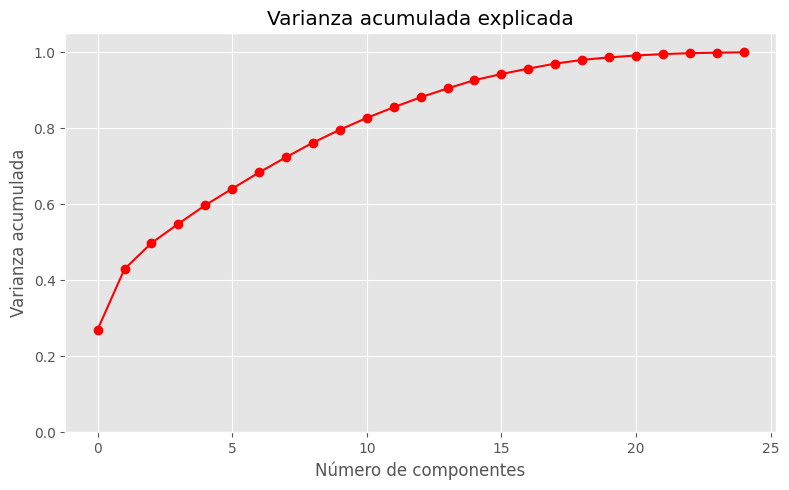

In [32]:
#Se crea la grafica para visualizar la varianza explicada
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(var_ratio),
    marker='o', linestyle='-', color='red'
)
plt.title('Varianza acumulada explicada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.ylim(0, 1.05)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
principalDf = pd.DataFrame(data = componentes
             , columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15',
                         'pca16', 'pca17', 'pca18','pca19','pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25'])
 
principalDf.head(10)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-1.699465,1.294379,-1.720077,-0.178349,0.494432,0.631928,-0.432146,-0.551674,-0.713058,-1.187760,...,0.852972,0.646395,-0.554847,-1.641461,-0.188425,-0.852457,0.331456,-0.097131,0.042840,0.003648
1,0.096248,-0.958267,-1.178949,0.177059,0.387696,0.152189,0.308413,-0.205078,-0.392991,-0.580673,...,0.115514,-0.124822,-0.050570,0.042419,-0.079810,-0.144804,-0.374372,0.111693,-0.299006,0.000127
2,2.708537,-1.292961,-0.165601,1.323398,0.585231,-0.368885,0.190118,0.423222,-1.352311,-0.420674,...,-0.238766,0.139127,-0.009243,0.071102,0.145803,0.144315,0.120626,-0.462741,-0.054875,0.051119
3,2.436606,-1.371232,-0.118171,0.377905,-1.778142,-0.624692,0.431463,0.605182,0.378364,0.813679,...,-0.728170,1.210521,0.422293,0.046261,0.199968,0.236589,0.259488,-0.683799,-0.314681,0.069158
4,-2.136696,-0.583463,-1.820379,-0.288749,0.198187,0.250122,0.040869,-0.498193,-0.449115,-0.268819,...,0.687478,0.575054,0.280712,-0.054992,-0.002743,-0.009636,-0.039724,0.127195,-0.186226,0.013163
5,-0.765890,-0.152013,1.653461,-1.049070,-0.269904,-0.015304,1.753532,0.102459,-0.825823,0.363280,...,0.719226,-0.375188,-0.756471,-0.127883,0.528107,0.699347,-0.046243,0.232950,0.054128,0.234570
6,-1.237641,-0.193787,1.434617,-2.045093,-0.019737,0.209467,1.128679,-0.618422,0.239419,1.270260,...,1.255597,0.766854,0.110243,-0.838330,0.946727,0.446065,-0.198717,0.068738,0.049003,0.126158
7,6.059900,1.684587,-1.040329,0.856659,-0.374705,0.449508,-0.500312,-0.036652,0.437292,0.934110,...,0.694061,0.506927,-0.126313,-0.622345,1.075911,-0.162019,0.822079,0.489113,-0.003455,-0.799768
8,6.888093,-2.283817,-0.159081,-0.910417,0.429656,0.772913,-0.586817,-0.442041,1.617443,1.775931,...,-0.202039,-0.034953,-0.282654,0.092840,0.037255,-0.033796,-0.129757,0.054129,-0.018017,-0.060010
9,2.109453,0.435779,-0.148669,-1.737002,-2.663787,1.994828,-1.060188,-1.457352,-1.180208,0.122927,...,0.854612,0.057699,-0.258269,-0.402963,-0.747892,-0.464191,-0.275429,0.141220,-0.347500,-0.005975


In [34]:
principalDF = pd.concat([principalDf, dfCredito[['default payment next month (Y)']]], axis = 1)
principalDF.head(5)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,default payment next month (Y)
0,-1.699465,1.294379,-1.720077,-0.178349,0.494432,0.631928,-0.432146,-0.551674,-0.713058,-1.187760,...,0.646395,-0.554847,-1.641461,-0.188425,-0.852457,0.331456,-0.097131,0.042840,0.003648,default
1,0.096248,-0.958267,-1.178949,0.177059,0.387696,0.152189,0.308413,-0.205078,-0.392991,-0.580673,...,-0.124822,-0.050570,0.042419,-0.079810,-0.144804,-0.374372,0.111693,-0.299006,0.000127,not default
2,2.708537,-1.292961,-0.165601,1.323398,0.585231,-0.368885,0.190118,0.423222,-1.352311,-0.420674,...,0.139127,-0.009243,0.071102,0.145803,0.144315,0.120626,-0.462741,-0.054875,0.051119,not default
3,2.436606,-1.371232,-0.118171,0.377905,-1.778142,-0.624692,0.431463,0.605182,0.378364,0.813679,...,1.210521,0.422293,0.046261,0.199968,0.236589,0.259488,-0.683799,-0.314681,0.069158,not default
4,-2.136696,-0.583463,-1.820379,-0.288749,0.198187,0.250122,0.040869,-0.498193,-0.449115,-0.268819,...,0.575054,0.280712,-0.054992,-0.002743,-0.009636,-0.039724,0.127195,-0.186226,0.013163,not default


#1 No se puede implementar una RLS. porque es una variable independientes versus la variable dependiente, y la explicacion de las variable más alta es de apenas un 27%. 
#2 Para el 90% se ocupan 15 componentes, entonces podria ser viable una regresión lineal multiple
#3 regresion lineal simple o regresion lineal multiple es que la variable y sea numerica continua